<a href="https://colab.research.google.com/github/summer9/kNN-prediction/blob/main/kNN_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset: Weather forcast

## PART 1: Familiarization and Basic Testing of the kNN Algorithm

### 1.Dataset Selection & data cleaning
- The dataset is about Weather type classification.
- We choose the data set since it is suitable for using kNN since it has: -

   * Features (Temperature,humidity, wind speed, precipitation, cloud cover,
atmospheric, pressure, UV Index, Season, Visibility, Location)

   * Target: weather type
- Large dataset: 13200 rows × 10 columns

Source: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification?select=weather_classification_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/summer9/kNN-prediction/refs/heads/main/weather_classification_data.csv")
df.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB
None


In [5]:
df.describe(include="object")

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [6]:
df.columns.tolist()

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Cloud Cover',
 'Atmospheric Pressure',
 'UV Index',
 'Season',
 'Visibility (km)',
 'Location',
 'Weather Type']

In [7]:
#check repeated rows
df.duplicated().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder
# Create a copy to preserve the original data
df_encoded = df.copy()

# Define mappings for 'Cloud Cover' and 'Season' columns, 'Location'
cloud_cover_mapping = {'clear': 0, 'cloudy':1, 'partly cloudy': 2, 'overcast': 3}
season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
location_mapping = {'coastal': 0, 'inland': 1, 'mountain': 2}

# Apply mappings to encode 'Cloud Cover' and 'Season', 'Location'
df_encoded['Cloud Cover'] = df_encoded['Cloud Cover'].map(cloud_cover_mapping)
df_encoded['Season'] = df_encoded['Season'].map(season_mapping)
df_encoded['Location'] = df_encoded['Location'].map(location_mapping)

print(df_encoded.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0           14        73         9.5                 82            2   
1           39        96         8.5                 71            2   
2           30        64         7.0                 16            0   
3           38        83         1.5                 82            0   
4           27        74        17.0                 66            3   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       1              3.5         1   
1               1011.43         7       2             10.0         1   
2               1018.72         5       2              5.5         2   
3               1026.25         7       2              1.0         0   
4                990.67         1       1              2.5         2   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


In [9]:
# Check for missing values in df2
missing_values = df.isnull().sum()
print(missing_values)

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [10]:
df2 = df_encoded
df2.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,2,1010.82,2,1,3.5,1,Rainy
1,39,96,8.5,71,2,1011.43,7,2,10.0,1,Cloudy
2,30,64,7.0,16,0,1018.72,5,2,5.5,2,Sunny
3,38,83,1.5,82,0,1026.25,7,2,1.0,0,Sunny
4,27,74,17.0,66,3,990.67,1,1,2.5,2,Rainy


In [11]:
# Export the encoded DataFrame to an Excel file
df2.to_csv(r'E:\PROJECT\HAMK\YEAR2\Predictive_analysis1\Assignment1\weather_export.csv', index=False)

###2.Algorithm Application: using KNN

In [12]:
# Separate features and target column
X = df2.drop(columns=['Weather Type'])
y = df2['Weather Type']

In [13]:
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14,73,9.5,82,2,1010.82,2,1,3.5,1
1,39,96,8.5,71,2,1011.43,7,2,10.0,1
2,30,64,7.0,16,0,1018.72,5,2,5.5,2
3,38,83,1.5,82,0,1026.25,7,2,1.0,0
4,27,74,17.0,66,3,990.67,1,1,2.5,2
...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14.5,71,3,1003.15,1,3,1.0,2
13196,-1,76,3.5,23,1,1067.23,1,1,6.0,0
13197,30,77,5.5,28,3,1012.69,3,4,9.0,0
13198,3,76,10.0,94,3,984.27,0,1,2.0,1


In [14]:
y

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy
...,...
13195,Rainy
13196,Snowy
13197,Cloudy
13198,Snowy


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 0)

In [16]:
K=5
knn=KNeighborsClassifier(K)
knn.fit(X_train, y_train)
y_pred_sklearn= knn.predict(X_test)
print(y_pred_sklearn)

['Rainy' 'Snowy' 'Cloudy' ... 'Snowy' 'Sunny' 'Rainy']


In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8985


###3.Use Case Identification:
1. Spotify - Music Recommendation System
*   Application: Spotify uses kNN in its recommendation engine to suggest songs based on user listening habits.
*   Example:
    - Analyzes each user’s music preferences and compares them to users with similar listening patterns.
    - Recommends songs, artists, and playlists through features like “Discover Weekly” to provide a personalized experience.

2. PayPal - Fraud Detection
*   Application: PayPal uses kNN as part of its fraud detection system to flag suspicious transactions.
*   Example:
    - Compares transaction details (location, amount, device) to typical user behavior.
    - Flags transactions as anomalies if they deviate significantly, such as a sudden large purchase in a foreign country.



# PART 2: In-Depth Experimentation with the kNN Algorithm

###2.1 Parameter Experimentation
  Experiment with various values of k to observe changes in model performance.

In [18]:

# Lists to hold K values and their corresponding accuracies
accuracies = []
k_values = []
# Loop through K values from 1 to 20
for k in range(1, 31):
    # Create a k-NN classifier for the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_sklearn = knn.predict(X_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred_sklearn)
    # Store the accuracy for K
    accuracies.append(accuracy)
    # Store the current K value
    k_values.append(k)
    print(f"Accuracy for K={k}: {accuracy:.4f}")

Accuracy for K=1: 0.8924
Accuracy for K=2: 0.8904
Accuracy for K=3: 0.9008
Accuracy for K=4: 0.9000
Accuracy for K=5: 0.8985
Accuracy for K=6: 0.9015
Accuracy for K=7: 0.8995
Accuracy for K=8: 0.8992
Accuracy for K=9: 0.8995
Accuracy for K=10: 0.9020
Accuracy for K=11: 0.8970
Accuracy for K=12: 0.8957
Accuracy for K=13: 0.8952
Accuracy for K=14: 0.8949
Accuracy for K=15: 0.8939
Accuracy for K=16: 0.8924
Accuracy for K=17: 0.8937
Accuracy for K=18: 0.8962
Accuracy for K=19: 0.8960
Accuracy for K=20: 0.8955
Accuracy for K=21: 0.8957
Accuracy for K=22: 0.8960
Accuracy for K=23: 0.8947
Accuracy for K=24: 0.8934
Accuracy for K=25: 0.8957
Accuracy for K=26: 0.8957
Accuracy for K=27: 0.8952
Accuracy for K=28: 0.8929
Accuracy for K=29: 0.8919
Accuracy for K=30: 0.8922


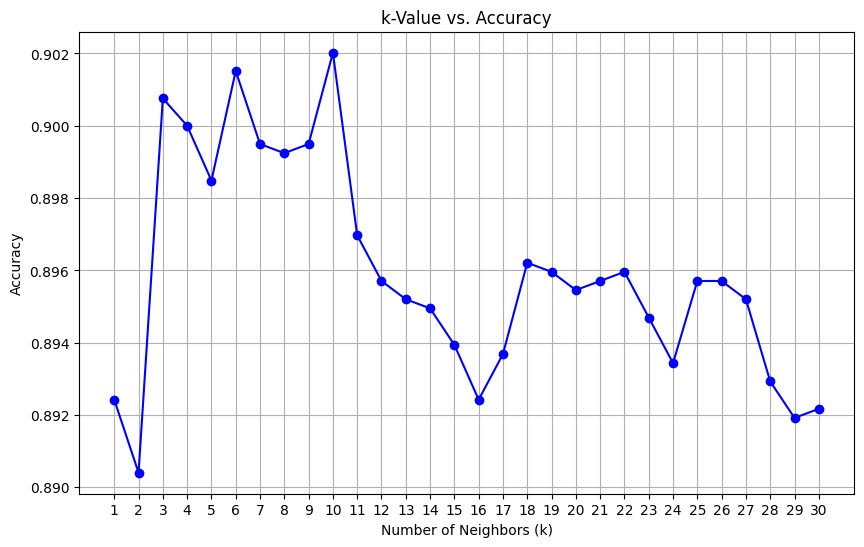

In [19]:
# Plotting the results after the loop
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')  # Plotting all accuracies
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-Value vs. Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Observe:


###2.2 Train-Test Split Analysis (2 pts):


In [20]:
# List to store accuracy scores for different splits
accuracy_results = []

# Evaluate different train-test splits
splits = [0.8, 0.7, 0.6,0.5,0.4,0.3,0.2,0.1]
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

    # Train a kNN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predict and evaluate accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append((split, accuracy))

# Print accuracy results
for split, accuracy in accuracy_results:
    print(f"Train/Test Split: {int(split*100)}/{int((1-split)*100)} - Accuracy: {accuracy:.2%}")

Train/Test Split: 80/19 - Accuracy: 88.75%
Train/Test Split: 70/30 - Accuracy: 89.02%
Train/Test Split: 60/40 - Accuracy: 89.03%
Train/Test Split: 50/50 - Accuracy: 88.62%
Train/Test Split: 40/60 - Accuracy: 88.40%
Train/Test Split: 30/70 - Accuracy: 88.18%
Train/Test Split: 20/80 - Accuracy: 88.10%
Train/Test Split: 10/90 - Accuracy: 87.60%


**Observe:**

*   Consistent Accuracy: Accuracy stays within 88-89% across all train/test splits, showing stable model performance.
*   Slight Dip at 50/50 Split: Accuracy slightly decreases to 88.62% with a 50/50 split, possibly due to less training data.
*   Best Performance at 60/40 Split: The highest accuracy (89.03%) is observed with a 60/40 split, indicating a good balance between training and testing data.
*   General Insight: The model performs reliably across splits, with a slight preference for more training data.




**Why kNN model does not change the accuracy even we splited out training and testing as above?**
- The choosen data set is large but simple (features are clear and relevant: 11 weather features, 1 target for weather type)


According to IBM, kNN is a simple and effective algorithm, often used for classification and regression tasks when data patterns are clear. It works by making predictions based on the closest data points (neighbors), which can lead to accurate results, even with smaller datasets.

However, **kNN can struggle with large datasets or when there are many irrelevant features,** as calculating distances becomes more time-consuming. To improve its performance, it's helpful to choose the right value for "k" and use feature selection. Overall, kNN is a great option for predicting outcomes with small to medium-sized data.

(source:

 IBM -https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN,used%20in%20machine%20learning%20today)

###2.3 k-Fold Cross-Validation

In [21]:
from sklearn.model_selection import KFold
# Define the number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [22]:
# Define the number of neighbors for k-NN
k_neighbors = 3
accuracies = []

for train_index, test_index in kf.split(X):
    # Use .iloc for row-based indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit the k-NN model
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)
print(f"Accuracies for each fold: {accuracies}")
print(f"Average Accuracy across all folds: {average_accuracy:.4f}")

Accuracies for each fold: [0.8837121212121212, 0.8871212121212121, 0.8829545454545454, 0.8950757575757575, 0.8962121212121212]
Average Accuracy across all folds: 0.8890


### Observe:

# Insights from k-Value Experimentation
Optimal
𝑘
k-Value: The model achieves peak accuracy of 0.8902 at
𝑘
=
11
k=11, with nearby values (7 to 15) also showing strong performance.

Small vs. Large
𝑘
k: Small
𝑘
k-values (e.g., 1 to 3) show lower accuracy, likely due to noise sensitivity, while larger values (>15) reduce accuracy as decision boundaries become too generalized.

Recommended Range: A
𝑘
k-value between 7 and 15 balances sensitivity and accuracy, making it a good choice for this dataset.